In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

In [2]:
import pandas as pd
from pymer4.models import Lmer
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("./data_test.csv")
data = data.astype({"image_id" : 'category', "model_type" : 'category', "data_type": 'category'})
data.head()

,image_id,model_type,char_acc,label_len,data_type
0,easy_0_0,baseline,0.1,10,easy
1,easy_0_1,baseline,0.4,10,easy
2,easy_0_2,baseline,0.0,7,easy
3,easy_0_3,baseline,1.0,5,easy
4,easy_0_4,baseline,1.0,13,easy


In [4]:
def define_box_properties(bplot, color_code):
    for patch in bplot['boxes'] :
        patch.set_facecolor(color_code)

In [5]:
color_baseline = '#ffbfcb'
color_srcnn = '#afd9e7'
color_tsrn = '#91ee8e'
color_tbsrn = '#f9dea9'

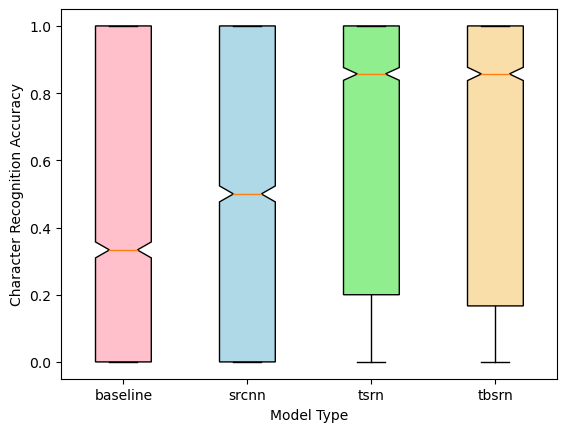

In [6]:
acc_base_line = data[data['model_type'] == 'baseline']['char_acc'].to_numpy()
acc_srcnn = data[data['model_type'] == 'srcnn']['char_acc'].to_numpy()
acc_tbsrn = data[data['model_type'] == 'tbsrn']['char_acc'].to_numpy()
acc_tsrn = data[data['model_type'] == 'tsrn']['char_acc'].to_numpy()
fig, ax = plt.subplots()
bplot = ax.boxplot([acc_base_line, acc_srcnn, acc_tsrn, acc_tbsrn], vert=True, notch=True, patch_artist=True)
colors = [color_baseline, color_srcnn, color_tsrn, color_tbsrn]
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

ax.set_xticklabels(['baseline', 'srcnn', 'tsrn', 'tbsrn'])
plt.xlabel('Model Type')
plt.ylabel('Character Recognition Accuracy')
plt.savefig('median_all_data_notch.png')

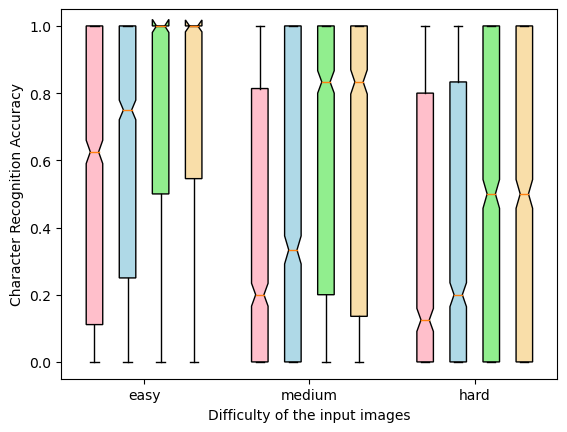

In [7]:
acc_base_line_easy = data[(data['model_type'] == 'baseline') & (data['data_type'] == 'easy')]['char_acc'].to_numpy()
acc_base_line_medium = data[(data['model_type'] == 'baseline') & (data['data_type'] == 'medium')]['char_acc'].to_numpy()
acc_base_line_hard = data[(data['model_type'] == 'baseline') & (data['data_type'] == 'hard')]['char_acc'].to_numpy()
acc_srcnn_easy = data[(data['model_type'] == 'srcnn') & (data['data_type'] == 'easy')]['char_acc'].to_numpy()
acc_srcnn_medium = data[(data['model_type'] == 'srcnn') & (data['data_type'] == 'medium')]['char_acc'].to_numpy()
acc_srcnn_hard = data[(data['model_type'] == 'srcnn') & (data['data_type'] == 'hard')]['char_acc'].to_numpy()
acc_tbsrn_easy = data[(data['model_type'] == 'tbsrn') & (data['data_type'] == 'easy')]['char_acc'].to_numpy()
acc_tbsrn_medium = data[(data['model_type'] == 'tbsrn') & (data['data_type'] == 'medium')]['char_acc'].to_numpy()
acc_tbsrn_hard = data[(data['model_type'] == 'tbsrn') & (data['data_type'] == 'hard')]['char_acc'].to_numpy()
acc_tsrn_easy = data[(data['model_type'] == 'tsrn') & (data['data_type'] == 'easy')]['char_acc'].to_numpy()
acc_tsrn_medium = data[(data['model_type'] == 'tsrn') & (data['data_type'] == 'medium')]['char_acc'].to_numpy()
acc_tsrn_hard = data[(data['model_type'] == 'tsrn') & (data['data_type'] == 'hard')]['char_acc'].to_numpy()

fig, ax = plt.subplots()
plt_acc_base_line = ax.boxplot([acc_base_line_easy, acc_base_line_medium, acc_base_line_hard], vert=True,  patch_artist=True, notch=True, positions=[1,6,11])
plt_acc_srcnn = ax.boxplot([acc_srcnn_easy, acc_srcnn_medium, acc_srcnn_hard], vert=True, patch_artist=True, notch=True, positions=[2,7,12])
plt_acc_tsrn = ax.boxplot([acc_tsrn_easy, acc_tsrn_medium, acc_tsrn_hard], vert=True, patch_artist=True, notch=True, positions=[3,8,13])
plt_acc_tbsrn = ax.boxplot([acc_tbsrn_easy, acc_tbsrn_medium, acc_tbsrn_hard], vert=True, patch_artist=True, notch=True, positions=[4,9,14])

define_box_properties(plt_acc_base_line, color_baseline)
define_box_properties(plt_acc_srcnn, color_srcnn)
define_box_properties(plt_acc_tsrn, color_tsrn)
define_box_properties(plt_acc_tbsrn, color_tbsrn)

ticks = ['easy', 'medium', 'hard']
plt.xticks([2.5, 7.5, 12.5], ticks)
plt.xlim(0, 15)
plt.xlabel('Difficulty of the input images')
plt.ylabel('Character Recognition Accuracy')
plt.savefig('median_data_type_notch.png')

In [8]:
differentMeans_model = Lmer(formula = "char_acc ~ model_type + (1 | image_id)", data = data)
differentMeans_model.fit(factors = {"model_type" : ["baseline", "srcnn", "tsrn", "tbsrn"]}, REML = False, summarize = False)

In [9]:
commonMean_model = Lmer(formula = "char_acc ~ (1 | image_id)", data = data)
commonMean_model.fit(REML = False, summarize = False)

In [10]:
def GLRT(mod1, mod2):

    chi_square = 2 * abs(mod1.logLike - mod2.logLike)
    delta_params = abs(len(mod1.coefs) - len(mod2.coefs))

    return {"chi_square" : chi_square, "df": delta_params, "p" : 1 - stats.chi2.cdf(chi_square, df=delta_params)}

In [11]:
GLRT(differentMeans_model, commonMean_model)

{'chi_square': 2708.679103880312, 'df': 3, 'p': 0.0}

In [12]:
post_hoc_results = differentMeans_model.post_hoc(marginal_vars = ["model_type"])

P-values adjusted by tukey method for family of 6 estimates


In [13]:
post_hoc_results[0]

,model_type,Estimate,2.5_ci,97.5_ci,SE,DF
0,baseline,0.441,0.428,0.453,0.006,inf
1,srcnn,0.493,0.481,0.506,0.006,inf
2,tbsrn,0.639,0.626,0.651,0.006,inf
3,tsrn,0.641,0.628,0.653,0.006,inf


In [14]:
post_hoc_results[1]

,Contrast,Estimate,2.5_ci,97.5_ci,SE,DF,Z-stat,P-val,Sig
0,baseline - srcnn,-0.052,-0.064,-0.041,0.005,inf,-11.476,0.000,***
1,baseline - tbsrn,-0.198,-0.210,-0.186,0.005,inf,-43.446,0.000,***
2,baseline - tsrn,-0.200,-0.212,-0.188,0.005,inf,-43.884,0.000,***
3,srcnn - tbsrn,-0.146,-0.157,-0.134,0.005,inf,-31.971,0.000,***
4,srcnn - tsrn,-0.148,-0.159,-0.136,0.005,inf,-32.409,0.000,***
5,tbsrn - tsrn,-0.002,-0.014,0.010,0.005,inf,-0.438,0.972,


In [15]:
model_expanded = Lmer("char_acc ~ model_type + data_type  + model_type:data_type + (1 | image_id)", data = data)
model_expanded.fit(factors = {"model_type" : ["baseline", "srcnn", "tsrn", "tbsrn"], "data_type" : ["easy", "medium", "hard"]}, REML = False, summarize=False)

In [16]:
model_nointeraction = Lmer("char_acc ~ model_type + data_type + (1 | image_id)", data = data)
model_nointeraction.fit(factors = {"model_type" : ["baseline", "srcnn", "tsrn", "tbsrn"], "data_type" : ["easy", "medium", "hard"]}, REML = False, summarize=False)

In [17]:
GLRT(model_expanded, model_nointeraction)

{'chi_square': 91.81515706793925, 'df': 6, 'p': 0.0}

In [18]:
post_hoc_results = model_expanded.post_hoc(marginal_vars = "model_type", grouping_vars = "data_type")

P-values adjusted by tukey method for family of 6 estimates


In [19]:
post_hoc_results[0]

,model_type,data_type,Estimate,2.5_ci,97.5_ci,SE,DF
0,baseline,easy,0.563,0.543,0.583,0.010,inf
1,srcnn,easy,0.627,0.607,0.646,0.010,inf
2,tbsrn,easy,0.761,0.742,0.781,0.010,inf
3,tsrn,easy,0.755,0.735,0.775,0.010,inf
4,baseline,hard,0.353,0.332,0.375,0.011,inf
5,srcnn,hard,0.380,0.358,0.402,0.011,inf
6,tbsrn,hard,0.510,0.489,0.532,0.011,inf
7,tsrn,hard,0.511,0.489,0.532,0.011,inf
8,baseline,medium,0.385,0.363,0.406,0.011,inf
9,srcnn,medium,0.448,0.427,0.469,0.011,inf


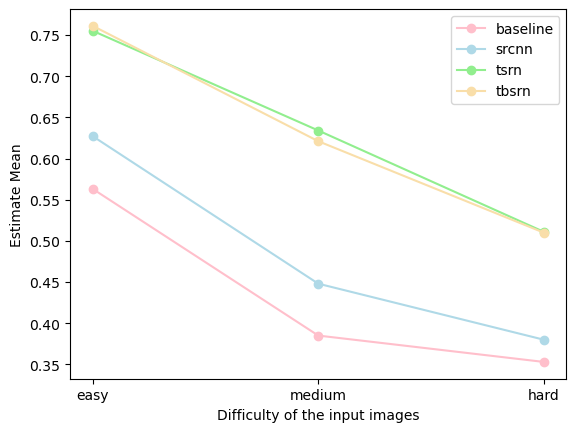

In [20]:
estimate_baseline = post_hoc_results[0][(post_hoc_results[0]['model_type'] == 'baseline')]['Estimate'].to_numpy()
estimate_baseline = [estimate_baseline[0], estimate_baseline[2], estimate_baseline[1]]
estimate_srcnn = post_hoc_results[0][(post_hoc_results[0]['model_type'] == 'srcnn')]['Estimate'].to_numpy()
estimate_srcnn = [estimate_srcnn[0], estimate_srcnn[2], estimate_srcnn[1]]
estimate_tsrn = post_hoc_results[0][(post_hoc_results[0]['model_type'] == 'tsrn')]['Estimate'].to_numpy()
estimate_tsrn = [estimate_tsrn[0], estimate_tsrn[2], estimate_tsrn[1]]
estimate_tbsrn = post_hoc_results[0][(post_hoc_results[0]['model_type'] == 'tbsrn')]['Estimate'].to_numpy()
estimate_tbsrn = [estimate_tbsrn[0], estimate_tbsrn[2], estimate_tbsrn[1]]

plt.plot([0, 1, 2], estimate_baseline, label="baseline", color=color_baseline, marker='o')
plt.plot([0, 1, 2], estimate_srcnn, label="srcnn", color=color_srcnn, marker='o')
plt.plot([0, 1, 2], estimate_tsrn, label = "tsrn", color=color_tsrn, marker='o')
plt.plot([0, 1, 2], estimate_tbsrn, label= "tbsrn", color=color_tbsrn, marker='o')
ticks = ['easy', 'medium', 'hard']
plt.xticks([0, 1, 2], ticks)
plt.legend()
plt.ylabel("Estimate Mean")
plt.xlabel("Difficulty of the input images")
plt.savefig('estimate_model_type.png')

In [21]:
post_hoc_results[1].query("data_type == 'easy'")

,Contrast,data_type,Estimate,2.5_ci,97.5_ci,SE,DF,Z-stat,P-val,Sig
0,baseline - srcnn,easy,-0.064,-0.083,-0.045,0.007,inf,-8.537,0.000,***
1,baseline - tbsrn,easy,-0.199,-0.218,-0.180,0.007,inf,-26.607,0.000,***
2,baseline - tsrn,easy,-0.192,-0.211,-0.173,0.007,inf,-25.739,0.000,***
3,srcnn - tbsrn,easy,-0.135,-0.154,-0.116,0.007,inf,-18.070,0.000,***
4,srcnn - tsrn,easy,-0.128,-0.148,-0.109,0.007,inf,-17.203,0.000,***
5,tbsrn - tsrn,easy,0.006,-0.013,0.026,0.007,inf,0.868,0.822,


In [22]:
post_hoc_results[1].query("data_type == 'medium'")

,Contrast,data_type,Estimate,2.5_ci,97.5_ci,SE,DF,Z-stat,P-val,Sig
12,baseline - srcnn,medium,-0.064,-0.084,-0.043,0.008,inf,-7.943,0.000,***
13,baseline - tbsrn,medium,-0.236,-0.257,-0.216,0.008,inf,-29.570,0.000,***
14,baseline - tsrn,medium,-0.250,-0.270,-0.229,0.008,inf,-31.237,0.000,***
15,srcnn - tbsrn,medium,-0.173,-0.193,-0.152,0.008,inf,-21.627,0.000,***
16,srcnn - tsrn,medium,-0.186,-0.207,-0.166,0.008,inf,-23.294,0.000,***
17,tbsrn - tsrn,medium,-0.013,-0.034,0.007,0.008,inf,-1.667,0.341,


In [23]:
post_hoc_results[1].query("data_type == 'hard'")

,Contrast,data_type,Estimate,2.5_ci,97.5_ci,SE,DF,Z-stat,P-val,Sig
6,baseline - srcnn,hard,-0.027,-0.048,-0.006,0.008,inf,-3.269,0.006,**
7,baseline - tbsrn,hard,-0.157,-0.178,-0.136,0.008,inf,-19.153,0.000,***
8,baseline - tsrn,hard,-0.157,-0.178,-0.136,0.008,inf,-19.190,0.000,***
9,srcnn - tbsrn,hard,-0.130,-0.151,-0.109,0.008,inf,-15.885,0.000,***
10,srcnn - tsrn,hard,-0.130,-0.151,-0.109,0.008,inf,-15.921,0.000,***
11,tbsrn - tsrn,hard,-0.000,-0.021,0.021,0.008,inf,-0.036,1.000,
